In [67]:
import numpy as np
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import matplotlib.pyplot as plt
import pandas as pd
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from scipy.optimize import differential_evolution
from pyswarms.utils.plotters.formatters import Mesher
from IPython.display import IFrame

# Оптимізація без функціональних обмежень
Візьмемо наступні три функції:

Фунція Буза:
$$
f(x_1, x_2) = (x_1 + 2x_2 - 7)^2 + (2x_1 + x_2 -5)^2
$$
що має мінімум $0$ в точці $(1, 3)$

Функція Ісома:
$$
f(x_1, x_2) = -\cos(x_1)\cos(x_2)e^{-(x_1 -\pi)^2 - (x_2 - \pi)^2}
$$
що має мінімум $-1$ в точці $(\pi, \pi)$


Функція Гіммельблау:
$$
f(x_1, x_2) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
$$
що має мінімум $0$ в точках $(3, 2), (-2.808118, 3.131312), (-3.779310,-3.283186), (3.584428,-1.848126)$

## Функція Буза

2024-06-02 07:57:24,477 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=1.84e-24
2024-06-02 07:57:26,929 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.8434559172529632e-24, best pos: [1. 3.]


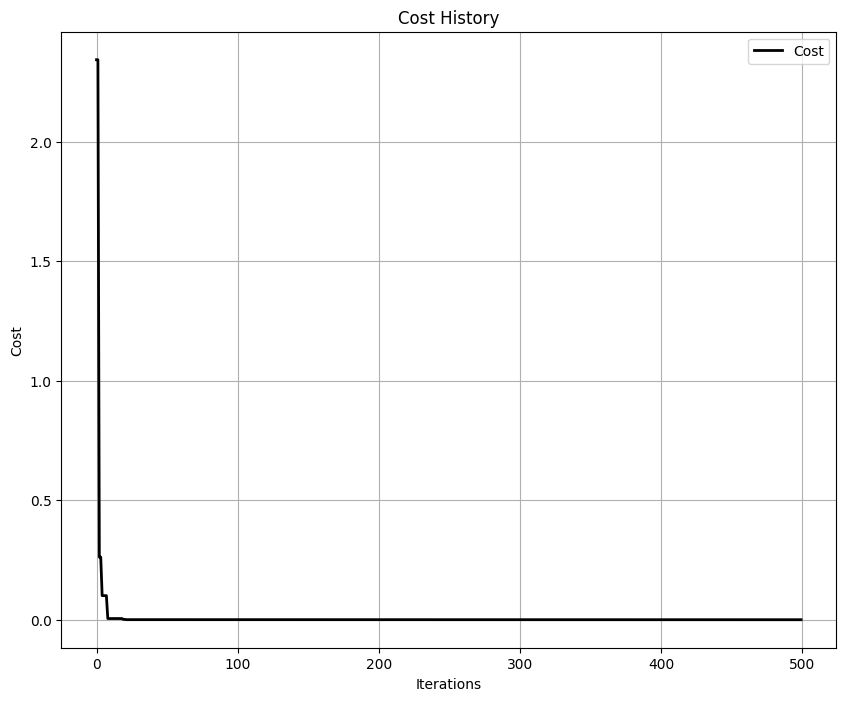

In [4]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
bounds = ([-10, -10], [10, 10])

optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=bounds)

cost, pos = optimizer.optimize(fx.booth, iters=500)
plot_cost_history(cost_history=optimizer.cost_history), plt.grid('on')
plt.show()

## Функція Ісома

2024-06-02 07:57:35,428 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=-1     
2024-06-02 07:57:39,348 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -1.0, best pos: [3.14159265 3.14159266]


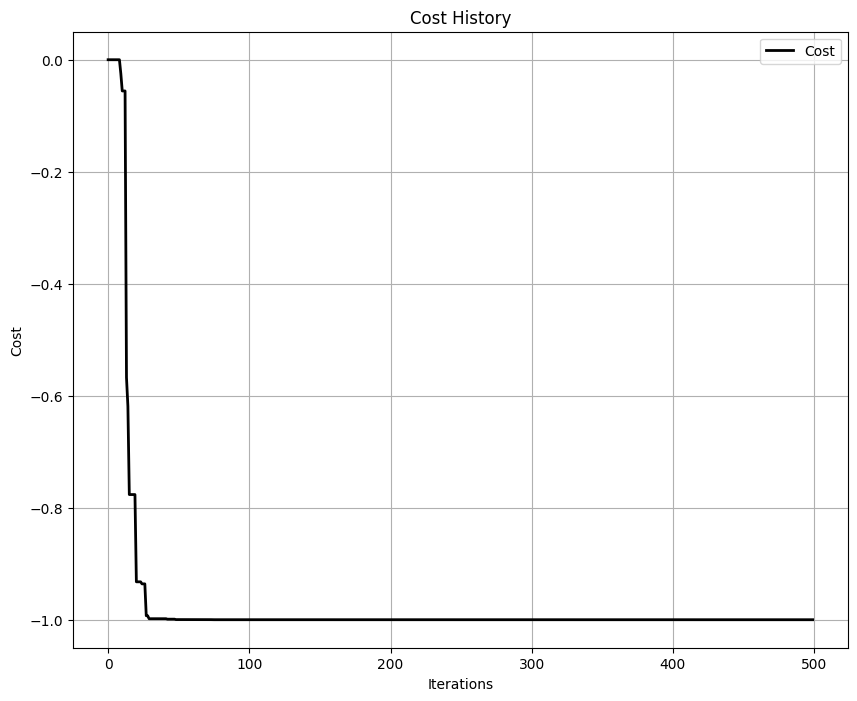

In [5]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
bounds = ([-100, -100], [100, 100])

optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=bounds)

cost, pos = optimizer.optimize(fx.easom, iters=500)
plot_cost_history(cost_history=optimizer.cost_history), plt.grid('on')
plt.show()

## Функція Гіммельблау

2024-06-02 08:01:20,469 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=1.18e-26
2024-06-02 08:01:24,135 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.1813980916589873e-26, best pos: [3. 2.]


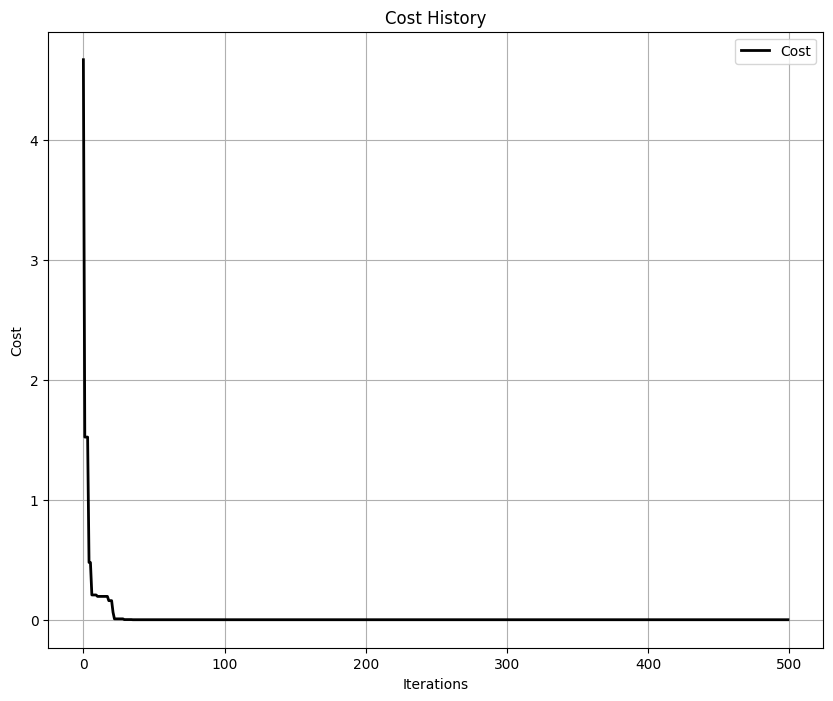

In [6]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
bounds = ([-5, -5], [5, 5])

optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=bounds)

cost, pos = optimizer.optimize(fx.himmelblau, iters=500)
plot_cost_history(cost_history=optimizer.cost_history), plt.grid('on')
plt.show()

# Оптимізація з функціональними обмеженнями
Візьмемо такі дві функції і відповідні обмеження:

Функція Таусенда:
$$
f(x_1, x_2) = -\cos^2((x_1-0.1)x_2) - x_1 \sin(3x_1 + x_2)
$$
із обмеженнями
$$
x_1^2 + x_2^2 < \left(2cos(t) - {1 \over 2}\cos(2t) - {1 \over 4}\cos(3t) - {1 \over 8}\cos(4t)\right)^2 + 2\sin^2(t)
$$
де $t = \text{atan2}(x_1, x_2)$
Функція має такий мінмум
$$
{\displaystyle f(2.0052938,1.1944509)=-2.0239884}
$$

Функція Сіміонеску:
$$
f(x_1, x_2) = 0.1x_1x_2
$$
з обмеженнями
$$
x_1^2 + x_2^2 \le \left(1 + 0.2\cos\left(8\cdot\arctan\left({x_1 \over x_2}\right)\right)\right)^2
$$
Функція має такий мінмум
$$
{\displaystyle f(\pm 0.85586214,\mp 0.85586214)=-0.072625}
$$

In [64]:
def townsend(vec):
    x1, x2 = vec[:, 0], vec[:, 1]
    t = np.arctan2(x1, x2)
    value = -(np.cos((x1 - 0.1) * x2) ** 2) - x1 * np.sin(3 * x1 + x2)
    constraint = (2 * np.cos(t) - (1 / 2) * np.cos(2 * t) - (1 / 4) * np.cos(3 * t) - (1 / 8) * np.cos(4 * t)) ** 2 + (2 * np.sin(t)) ** 2
    
    value = np.where( (x1 ** 2 + x2 ** 2) < constraint, value, np.inf)
    return value

def simionescu(vec):
    x1, x2 = vec[:, 0], vec[:, 1]
    constraint = (1 + 0.2 * np.cos(8 * np.arctan(x1 / x2))) ** 2
    value = 0.1 * x1 * x2
    value = np.where( (x1 ** 2 + x2 ** 2) < constraint, value, np.inf)
    return value

## Функція Таусенда

2024-06-02 08:45:59,973 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 1, 'c2': 2, 'w': 0.4}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=-2.02
2024-06-02 08:46:02,590 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.02397510205091, best pos: [2.0061805  1.19284005]


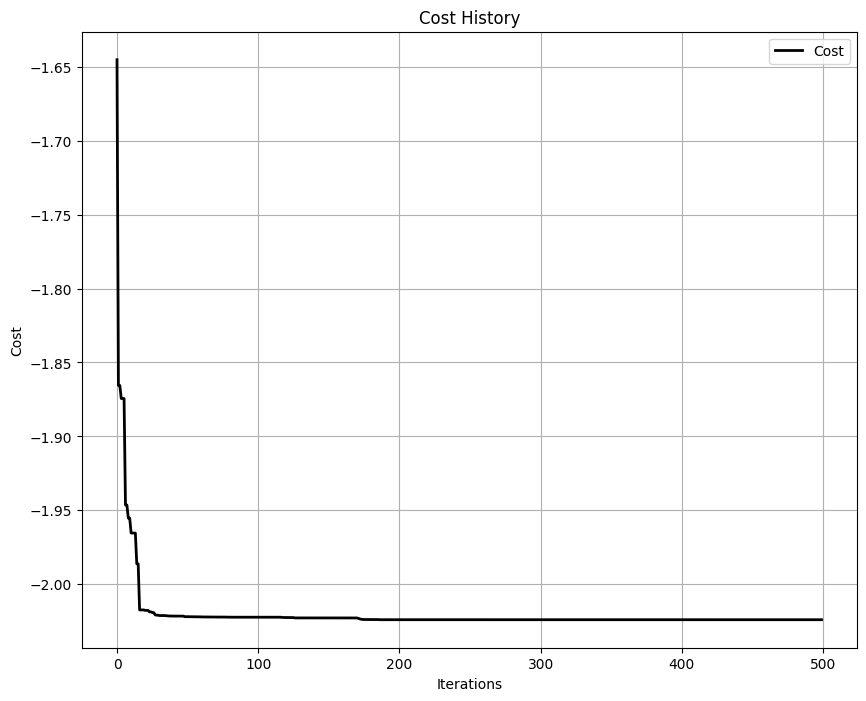

In [65]:
options = {'c1': 1, 'c2': 2, 'w':0.4}
bounds = ([-2.25, -2.5], [2.5, 1.75])

optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=2, options=options, bounds=bounds)

cost, pos = optimizer.optimize(townsend, iters=500)
plot_cost_history(cost_history=optimizer.cost_history), plt.grid('on')
plt.show()

## Функція Сіміонеску

2024-06-02 08:45:32,929 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/500, best_cost=-0.0655

pyswarms.single.global_best: 100%|██████████|500/500, best_cost=-0.072
2024-06-02 08:45:36,163 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.07199987506032103, best pos: [ 0.84821363 -0.84884129]


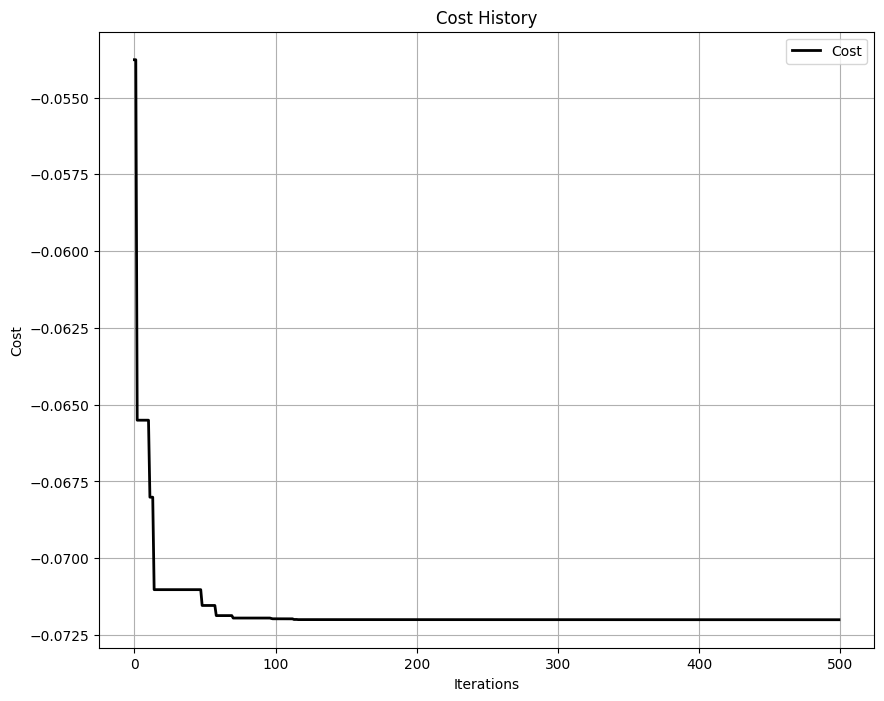

In [63]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
bounds = ([-1.25] * 2, [1.25] * 2)

optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=bounds)

cost, pos = optimizer.optimize(simionescu, iters=500)
plot_cost_history(cost_history=optimizer.cost_history), plt.grid('on')
plt.show()

# Нелінійна регресія
Для виконання цього пункуту завдання, оберемо моделі із варіантів 10 та 14 відповідно:
$$
y = b_1 \left(1 - {1 \over \sqrt{1 + 2 b_2x}}\right),\; b_1 \in [100; 1000], b_2 \in [0, 1]
$$
та
$$
y = {b_1(x^2 + x b_2) \over x^2 + xb_3 + b_4},\; b_i \in [0;1] \, i = \overline{1, 4}
$$

In [68]:
def get_data(variant):
    if variant < 10:
        variant = '0' + str(variant)
    var = pd.read_excel("DataRegression.xlsx", sheet_name=f"Var{variant}")
    return var['x'].to_numpy(), var['y'].to_numpy()

## Варінт 10

In [145]:
X, y = get_data(10)
n = X.shape[0]
X_train, X_test = X[:n * 3 // 4], X[n * 3//4:]
y_train, y_test = y[:n * 3 // 4], y[n * 3//4:]

In [146]:
def regression10(params):
    b1, b2 = params
    predictions = b1 * (1 - 1 / np.sqrt(1 + 2 * b2 * X_train))
    return np.mean(np.abs((predictions - y_train)))

def model10(params):
    def func(X):
        b1, b2 = params
        return b1 * (1 - 1 / np.sqrt(1 + 2 * b2 * X))
    return func

In [147]:
bounds = [(100, 1000), (0, 1)]

result = differential_evolution(regression10, bounds)
result.x, result.fun

(array([6.1069720e+02, 2.1785345e-04]), 0.01705264207700665)

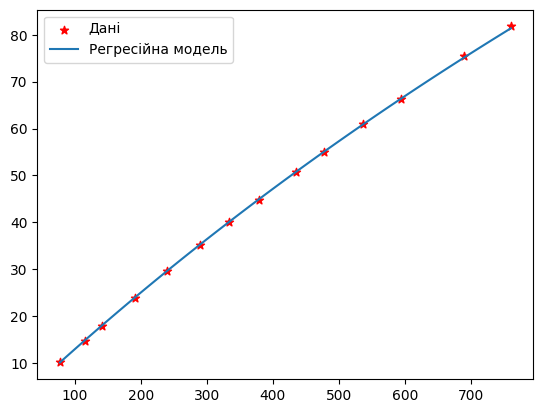

In [151]:
X_plot = np.linspace(min(X), max(X), 100)
y_plot = model10(result.x)(X_plot)
plt.scatter(X, y, label="Дані", c="r", marker="*")
plt.plot(X_plot, y_plot, label="Регресійна модель")
plt.legend()
plt.show()

## Варінт 14

In [152]:
X, y = get_data(14)
n = X.shape[0]
X_train, X_test = X[:n * 3 // 4], X[n * 3//4:]
y_train, y_test = y[:n * 3 // 4], y[n * 3//4:]

In [153]:
def regression14(params):
    b1, b2, b3, b4 = params
    predictions = (b1 * (X_train ** 2 + X_train * b2) / (X_train ** 2 + X_train * b3 + b4))
    return np.mean(np.abs((predictions - y_train)))

def model14(params):
    def func(X):
        b1, b2, b3, b4 = params
        return (b1 * (X ** 2 + X * b2) / (X ** 2 + X * b3 + b4))
    return func

In [154]:
bounds = [(0, 1)] * 4

result = differential_evolution(regression14, bounds)
result.x, result.fun

(array([0.19372391, 0.17427345, 0.09921434, 0.13163219]),
 0.0038175663363942836)

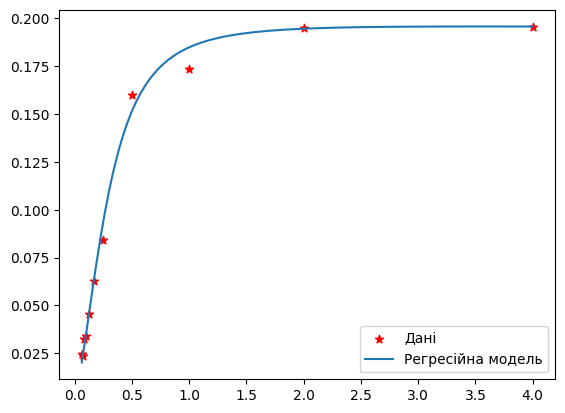

In [155]:
X_plot = np.linspace(min(X), max(X), 100)
y_plot = model14(result.x)(X_plot)
plt.scatter(X, y, label="Дані", c="r", marker="*")
plt.plot(X_plot, y_plot, label="Регресійна модель")
plt.legend()
plt.show()